In [2]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt

## Critics for NYT, by gender and their work counts

In [283]:
df = pd.read_csv('critics_all_fixed.csv', index_col = 0).reset_index(drop = True)

In [284]:
df 

,critic,counts,gender
0,STEPHEN HOLDEN,1745,male
1,A. O. SCOTT,1987,male
2,JEANNETTE CATSOULIS,1376,female
3,MANOHLA DARGIS,1253,female
4,NEIL GENZLINGER,557,male
5,BEN KENIGSBERG,478,male
6,ELVIS MITCHELL,442,male
7,GLENN KENNY,435,male
8,ANDY WEBSTER,386,male
9,NICOLAS RAPOLD,344,male


In [285]:
df_gender = df.groupby(by = 'gender').count().reset_index()

In [286]:
df_gender

,gender,critic,counts
0,female,21,21
1,male,37,37


In [287]:
df_work = df.groupby(by = 'gender').sum().reset_index()
df_work

,gender,counts
0,female,3130
1,male,7673


In [301]:
df_merge = pd.merge(df_gender, df_work, on = 'gender')

In [302]:
df_merge.rename(columns={'counts_x': 'critic', 'counts_y': 'work'}, inplace=True)
df_merge

,gender,critic,critic,work
0,female,21,21,3130
1,male,37,37,7673


In [303]:
df_merge = df_merge.loc[:, ~df_merge.columns.duplicated()]

In [304]:
df_merge

,gender,critic,work
0,female,21,3130
1,male,37,7673


In [305]:
df_merge['avg_work'] = round(df_merge['work']/df_merge['critic'],2)

In [306]:
df_merge['critic'] = round(df_merge['critic']/21,2)
df_merge

,gender,critic,work,avg_work
0,female,1.00,3130,149.05
1,male,1.76,7673,207.38


In [307]:
df_merge['work'] = round(df_merge['work']/3130,2)
df_merge['avg_work'] = round(df_merge['avg_work']/149.05,2)
df_merge

,gender,critic,work,avg_work
0,female,1.00,1.00,1.00
1,male,1.76,2.45,1.39


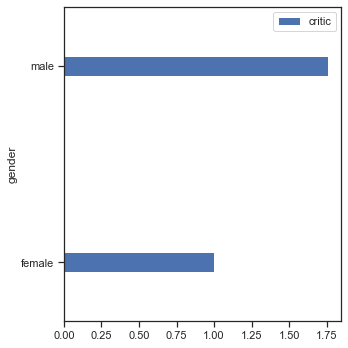

In [308]:
df_merge.plot(x = 'gender', y = 'critic', kind = 'barh', figsize = [5,5], \
              width = 0.1)
plt.tight_layout()
plt.savefig('output1.pdf')

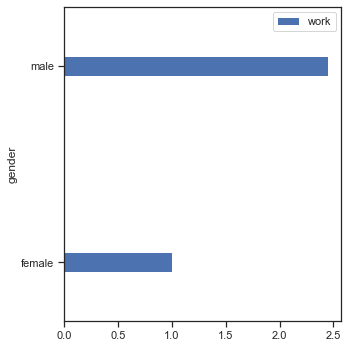

In [309]:
df_merge.plot(x = 'gender', y = 'work', kind = 'barh', figsize = [5,5], \
              width = 0.1)
plt.tight_layout()
plt.savefig('output2.pdf')

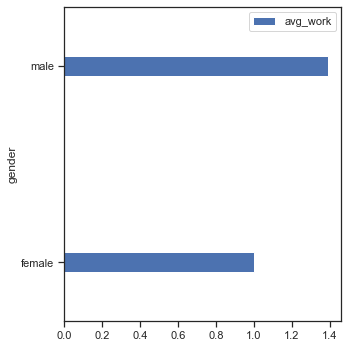

In [310]:
df_merge.plot(x = 'gender', y = 'avg_work', kind = 'barh', figsize = [5,5], \
              width = 0.1)

plt.tight_layout()
plt.savefig('output3.pdf')

In [311]:
df2 = pd.read_csv('all_reviews.csv', index_col = 0)
df2

,byline,headline,open_date,pick_or_not,pub_date,rating,title
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!"
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow


In [312]:
df2 = df2[~df2['pub_date'].str.contains('1999')]

In [313]:
df3 = df2[df2['pick_or_not'] == 1]
df3

,byline,headline,open_date,pick_or_not,pub_date,rating,title
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man
15,GLENN KENNY,‘Sword of Trust’ Review: Marc Maron in a Comed...,2019-07-19,1,2019-07-11,R,Sword of Trust
16,JEANNETTE CATSOULIS,"‘Firecrackers’ Review: Young, Angry and Trapped",NaN,1,2019-07-11,NaN,Firecrackers
17,BEN KENIGSBERG,‘Sea of Shadows’ Review: A Suspenseful Story o...,2019-07-12,1,2019-07-11,PG-13,Sea of Shadows
29,GLENN KENNY,‘Marianne & Leonard’ Review: An Emotionally Co...,2019-07-05,1,2019-07-04,R,Marianne & Leonard: Words of Love
37,GLENN KENNY,‘The Plagiarists’ Review: A Sharp Satire Built...,2019-06-28,1,2019-06-27,NaN,The Plagiarists


In [315]:
df3_gender = df3.groupby(by = 'byline').count().reset_index()
df3_gender

,byline,headline,open_date,pick_or_not,pub_date,rating,title
0,A. O. SCOTT,449,235,449,449,360,449
1,A.&#160;O. SCOTT,2,0,2,2,2,2
2,A.O. SCOTT,72,57,72,72,45,72
3,AISHA HARRIS,1,1,1,1,0,1
4,ANDY WEBSTER,71,40,71,71,28,71
5,ANITA GATES,2,0,2,2,1,2
6,BEN KENIGSBERG,47,28,47,47,10,47
7,BILGE EBIRI,13,9,13,13,4,13
8,BRIAN SEIBERT,1,1,1,1,0,1
9,BY A. O. SCOTT,2,2,2,2,2,2


In [316]:
df3_gender = df3_gender.drop(columns = ['headline','open_date','pub_date','rating','title'])

In [317]:
df3_gender.to_csv('pick.csv')

In [318]:
pick = pd.read_csv('pick_fixed.csv', index_col = 0)
pick

,byline,pick_or_not
0,A. O. SCOTT,540
3,AISHA HARRIS,1
4,ANDY WEBSTER,71
5,ANITA GATES,2
6,BEN KENIGSBERG,47
7,BILGE EBIRI,13
8,BRIAN SEIBERT,1
14,CARINA CHOCANO,1
15,DANIEL M. GOLD,18
16,DAVE KEHR,4


In [321]:
critics = pd.read_csv('critics_all_fixed.csv', index_col = 0)
critics = critics.rename(columns = {'critic':'byline'})

In [322]:
picks = pd.merge(pick, critics, on ='byline').drop(columns = 'counts')
picks

,byline,pick_or_not,gender
0,A. O. SCOTT,540,male
1,AISHA HARRIS,1,female
2,ANDY WEBSTER,71,male
3,ANITA GATES,2,female
4,BEN KENIGSBERG,47,male
5,BILGE EBIRI,13,male
6,BRIAN SEIBERT,1,male
7,CARINA CHOCANO,1,female
8,DANIEL M. GOLD,18,male
9,DAVE KEHR,4,male


In [323]:
pick_gender = picks.groupby(by = 'gender').count().reset_index()
pick_gender = pick_gender.drop(columns = 'pick_or_not')
pick_gender

,gender,byline
0,female,14
1,male,24


In [324]:
pick_work = picks.groupby(by = 'gender').sum().reset_index()
pick_work

,gender,pick_or_not
0,female,768
1,male,1567


In [325]:
pick_merge = pd.merge(pick_gender,pick_work, on = 'gender')
pick_merge['pick_per_critic'] = round(pick_merge['pick_or_not']/pick_merge['byline'],2)
pick_merge

,gender,byline,pick_or_not,pick_per_critic
0,female,14,768,54.86
1,male,24,1567,65.29


In [326]:
pick_merge['byline'] = round(pick_merge['byline']/14,2)

In [327]:
pick_merge['pick_or_not'] = round(pick_merge['pick_or_not']/768,2)

In [328]:
pick_merge['pick_per_critic'] = round(pick_merge['pick_per_critic']/54.86,2)

In [329]:
pick_merge

,gender,byline,pick_or_not,pick_per_critic
0,female,1.00,1.00,1.00
1,male,1.71,2.04,1.19


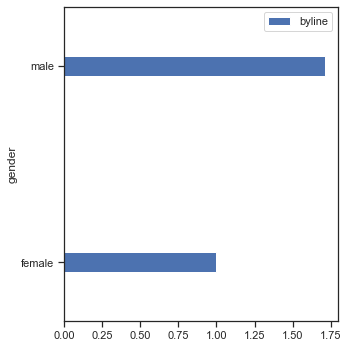

In [330]:
pick_merge.plot(x = 'gender', y = 'byline', kind = 'barh', figsize = [5,5], \
              width = 0.1)

plt.tight_layout()
plt.savefig('output4.pdf')

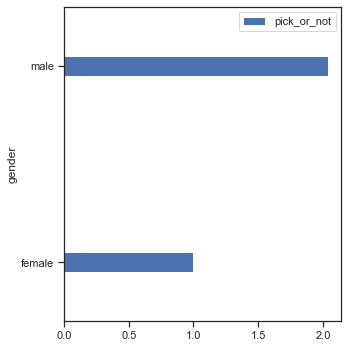

In [331]:
pick_merge.plot(x = 'gender', y = 'pick_or_not', kind = 'barh', figsize = [5,5], \
              width = 0.1)

plt.tight_layout()
plt.savefig('output5.pdf')

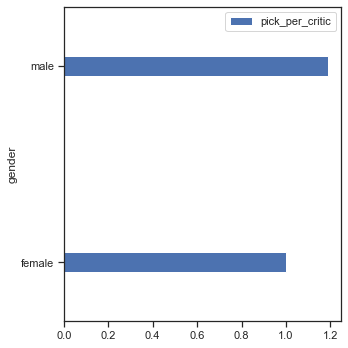

In [332]:
pick_merge.plot(x = 'gender', y = 'pick_per_critic', kind = 'barh', figsize = [5,5], \
              width = 0.1)

plt.tight_layout()
plt.savefig('output6.pdf')

In [333]:
df2 = pd.read_csv('all_reviews.csv', index_col = 0)
df2

,byline,headline,open_date,pick_or_not,pub_date,rating,title
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!"
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow


In [334]:
df2 = df2[~df2['pub_date'].str.contains('1999')]

In [335]:
df2

,byline,headline,open_date,pick_or_not,pub_date,rating,title
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!"
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow


In [336]:
df2['RT'] = df2['title'].str.lower()
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once upon a time ... in hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels are made of light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the great hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a faithful man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!","cassandro, the exotico!"
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom of the 9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i do not care if we go down in history as barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,she's just a shadow


In [337]:
df2['RT'] = df2['RT'].str.replace(' ','_')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_..._in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!","cassandro,_the_exotico!"
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,she's_just_a_shadow


In [338]:
df2['RT'] = df2['RT'].str.replace("'",'')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_..._in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!","cassandro,_the_exotico!"
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [339]:
df2['RT'] = df2['RT'].str.replace(':','')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_..._in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!","cassandro,_the_exotico!"
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [340]:
df2['RT'] = df2['RT'].str.replace(',','')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_..._in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico!
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [341]:
df2['RT'] = df2['RT'].str.replace('&','and')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_..._in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico!
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [342]:
df2['RT'] = df2['RT'].str.replace('\.\.\.','')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time__in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico!
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [343]:
df2['RT'] = df2['RT'].str.replace('!','')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time__in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [344]:
df2['RT'] = df2['RT'].str.replace('__','_')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [345]:
df2['RT'] = df2['RT'].str.replace('_$','')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [346]:
df2['RT'] = df2['RT'].str.replace('_-_','_')
df2

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
0,A.O. SCOTT,‘Once Upon a Time … in Hollywood’ Review: We L...,2019-07-26,1,2019-07-24,R,Once Upon a Time ... in Hollywood,once_upon_a_time_in_hollywood
1,BILGE EBIRI,‘Angels Are Made of Light’ Review: Despair Mee...,2019-07-24,1,2019-07-23,NaN,Angels Are Made of Light,angels_are_made_of_light
2,BEN KENIGSBERG,‘The Great Hack’ Review: How Your Data Became ...,2019-07-24,1,2019-07-23,NaN,The Great Hack,the_great_hack
3,JEANNETTE CATSOULIS,‘Rosie’ Review: Lean Streets,2019-07-19,1,2019-07-18,PG-13,Rosie,rosie
4,BEN KENIGSBERG,‘A Faithful Man’ Review: Low Key. Low Fidelity.,2019-07-19,1,2019-07-18,NaN,A Faithful Man,a_faithful_man
5,ELISABETH VINCENTELLI,‘Point Blank’ Review: A Buddy Flick That Hobbl...,2019-07-12,0,2019-07-18,NaN,Point Blank,point_blank
6,GLENN KENNY,‘Cassandro the Exotico!’ Review: A Gay Luchad...,2019-07-19,0,2019-07-18,NaN,"Cassandro, the Exotico!",cassandro_the_exotico
7,TEO BUGBEE,‘Bottom of the 9th’ Review: A Stroll Around th...,2019-07-19,0,2019-07-18,R,Bottom of the 9th,bottom_of_the_9th
8,A.O. SCOTT,Review: Making a Spectacle of History (and Her...,2019-07-19,0,2019-07-18,NaN,I Do Not Care If We Go Down in History as Barb...,i_do_not_care_if_we_go_down_in_history_as_barb...
9,JEANNETTE CATSOULIS,‘She’s Just a Shadow’ Review: Tokyo Grift,NaN,0,2019-07-18,NaN,She's Just a Shadow,shes_just_a_shadow


In [347]:
df2.to_csv('reviews_rt.csv')

In [348]:
df19 = df2[df2['pub_date'].str.contains('2019')]

In [349]:
value_counts = df19.byline.value_counts()
critic19 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [350]:
critic19.to_csv('critic19.csv')

In [207]:
df18 = df2[df2['pub_date'].str.contains('2018')]

In [249]:
value_counts = df18.byline.value_counts()
critic18 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [251]:
critic18.to_csv('critic18.csv')

In [208]:
df17 = df2[df2['pub_date'].str.contains('2017')]

In [231]:
value_counts = df17.byline.value_counts()
critic17 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [252]:
critic17.to_csv('critic17.csv')

In [209]:
df16 = df2[df2['pub_date'].str.contains('2016')]

In [232]:
value_counts = df16.byline.value_counts()
critic16 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [253]:
critic16.to_csv('critic16.csv')

In [272]:
df15 = df2[df2['pub_date'].str.contains('2015')]
df15

,byline,headline,open_date,pick_or_not,pub_date,rating,title,RT
1202,BEN KENIGSBERG,"Review: In ‘The Himalayas,’ Two Climbers Form ...",2016-01-01,0,2015-12-31,NaN,The Himalayas,the_himalayas
1203,NICOLAS RAPOLD,"Review: ‘Only Yesterday,’ Isao Takahata’s Time...",2016-02-26,0,2015-12-31,PG,Only Yesterday,only_yesterday
1204,GLENN KENNY,"Review: In ‘Yosemite,’ a Coming-of-Age Tale of...",2016-01-01,0,2015-12-31,R,Yosemite,yosemite
1205,JEANNETTE CATSOULIS,"Review: In ‘Other People’s Children,’ a Woman’...",2015-12-25,0,2015-12-31,NaN,Other People's Children,other_peoples_children
1206,MANOHLA DARGIS,Review: ‘Anomalisa’ Pairs Charlie Kaufman and ...,NaN,1,2015-12-29,R,Anomalisa,anomalisa
1207,NICOLAS RAPOLD,"Review: ‘Point Break,’ an X-Games Remake",2015-12-25,0,2015-12-25,PG-13,Point Break,point_break
1208,GLENN KENNY,Review: Restored ‘The Story of the Last Chrysa...,1979-01-15,1,2015-12-24,NaN,The Story of the Last Chrysanthemums,the_story_of_the_last_chrysanthemums
1209,A. O. SCOTT,Review: Quentin Tarantino’s ‘The Hateful Eight...,2015-12-30,0,2015-12-24,R,The Hateful Eight,the_hateful_eight
1210,NEIL GENZLINGER,Review: ‘TransFatty Lives’ Chronicles a Life W...,2015-11-20,0,2015-12-24,NaN,TransFatty Lives,transfatty_lives
1211,MANOHLA DARGIS,Review: ‘The Revenant’ Welcomes You to Paradis...,2016-01-08,0,2015-12-24,R,The Revenant,the_revenant


In [273]:
value_counts = df15.byline.value_counts()
critic15 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [254]:
critic15.to_csv('critic15.csv')

In [211]:
df14 = df2[df2['pub_date'].str.contains('2014')]

In [234]:
value_counts = df14.byline.value_counts()
critic14 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [255]:
critic14.to_csv('critic14.csv')

In [212]:
df13 = df2[df2['pub_date'].str.contains('2013')]

In [235]:
value_counts = df13.byline.value_counts()
critic13 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [256]:
critic13.to_csv('critic13.csv')

In [213]:
df12 = df2[df2['pub_date'].str.contains('2012')]

In [236]:
value_counts = df12.byline.value_counts()
critic12 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [257]:
critic12.to_csv('critic12.csv')

In [214]:
df11 = df2[df2['pub_date'].str.contains('2011')]

In [237]:
value_counts = df11.byline.value_counts()
critic11 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [258]:
critic11.to_csv('critic11.csv')

In [215]:
df10 = df2[df2['pub_date'].str.contains('2010')]

In [238]:
value_counts = df10.byline.value_counts()
critic10 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [259]:
critic10.to_csv('critic10.csv')

In [216]:
df09 = df2[df2['pub_date'].str.contains('2009')]

In [239]:
value_counts = df09.byline.value_counts()
critic09 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [260]:
critic09.to_csv('critic09.csv')

In [217]:
df08 = df2[df2['pub_date'].str.contains('2008')]

In [240]:
value_counts = df08.byline.value_counts()
critic08 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [261]:
critic08.to_csv('critic08.csv')

In [218]:
df07 = df2[df2['pub_date'].str.contains('2007')]

In [241]:
value_counts = df07.byline.value_counts()
critic07 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [262]:
critic07.to_csv('critic07.csv')

In [351]:
df06 = df2[df2['pub_date'].str.contains('2006')]

In [352]:
value_counts = df06.byline.value_counts()
critic06 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [353]:
critic06.to_csv('critic06.csv')

In [354]:
df05 = df2[df2['pub_date'].str.contains('2005')]

In [355]:
value_counts = df05.byline.value_counts()
critic05 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [356]:
critic05.to_csv('critic05.csv')

In [357]:
df04 = df2[df2['pub_date'].str.contains('2004')]

In [358]:
value_counts = df04.byline.value_counts()
critic04 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [359]:
critic04.to_csv('critic04.csv')

In [222]:
df03 = df2[df2['pub_date'].str.contains('2003')]

In [245]:
value_counts = df03.byline.value_counts()
critic03 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [266]:
critic03.to_csv('critic03.csv')

In [223]:
df02 = df2[df2['pub_date'].str.contains('2002')]

In [246]:
value_counts = df02.byline.value_counts()
critic02 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [267]:
critic02.to_csv('critic02.csv')

In [224]:
df01 = df2[df2['pub_date'].str.contains('2001')]

In [247]:
value_counts = df01.byline.value_counts()
critic01 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [268]:
critic01.to_csv('critic01.csv')

In [225]:
df00 = df2[df2['pub_date'].str.contains('2000')]

In [248]:
value_counts = df00.byline.value_counts()
critic00 = value_counts.rename_axis('critic').to_frame('counts').reset_index()

In [269]:
critic00.to_csv('critic00.csv')